# 📈 Stock Price Prediction
This project predicts Apple stock prices using Linear Regression and LSTM.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM



In [6]:
# Download historical stock data for Apple
df = yf.download('AAPL', start='2016-01-01', end='2024-12-31')
df = df[['Close']].dropna()
df.tail()


/var/folders/j3/lcmxftvx581_6b3sxm5zwtb80000gn/T/ipykernel_87374/1146326814.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2016-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2024-12-23,254.655716
2024-12-24,257.578674
2024-12-26,258.396667
2024-12-27,254.974930
2024-12-30,251.593094


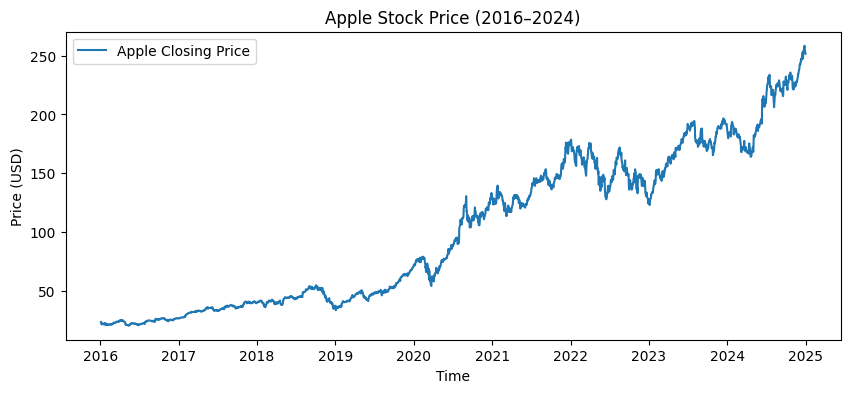

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Apple Closing Price')
plt.title('Apple Stock Price (2016–2024)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


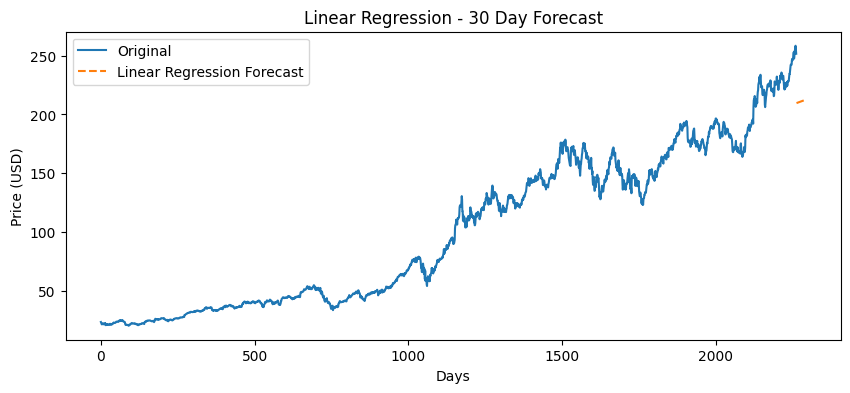

In [9]:
df_lr = df.copy().reset_index()
df_lr['Days'] = np.arange(len(df_lr))
X = df_lr['Days'].values.reshape(-1, 1)
y = df_lr['Close'].values.reshape(-1, 1)

# Train model
model_lr = LinearRegression().fit(X, y)

# Predict for next 30 days
X_future = np.arange(len(X), len(X)+30).reshape(-1, 1)
future_preds_lr = model_lr.predict(X_future)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(df_lr['Close'], label='Original')
plt.plot(np.arange(len(X), len(X)+30), future_preds_lr, label='Linear Regression Forecast', linestyle='--')
plt.title('Linear Regression - 30 Day Forecast')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']])

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]

X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)


In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=2, batch_size=32)


Epoch 1/2
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0204
Epoch 2/2
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.8198e-04


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


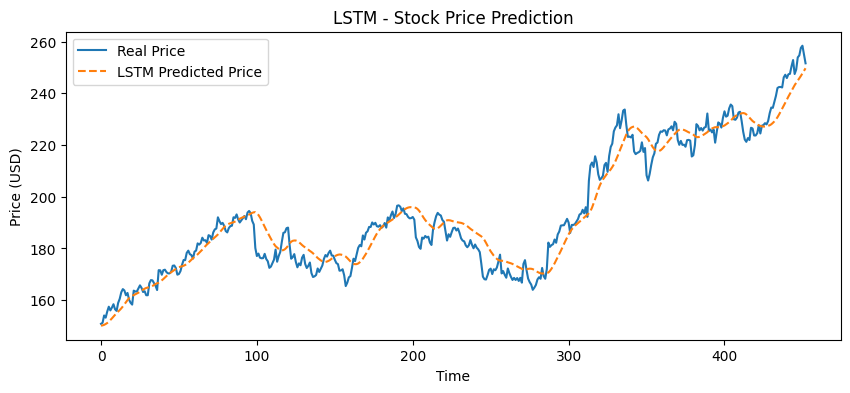

In [14]:
test_data = scaled_data[train_size-60:]
X_test = []

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i])

X_test = np.array(X_test)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

real_prices = df['Close'].values[train_size:]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(real_prices, label='Real Price')
plt.plot(predictions, label='LSTM Predicted Price', linestyle='--')
plt.title('LSTM - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
